In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Since all the required libraries have been imported. The first step is to retrieve the dataset.

In [3]:
df = pd.read_csv(r"C:\Users\jjjib\Desktop\Projects\DataTrained\Week 2\abalone.csv")

Let us now look into the dataset to better understand the values that we deal with

In [5]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
df.shape

(4177, 9)

Now we know how the dataset looks like, let us further get into the description of the dataset 

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Here, we can note that the column sex is not present. That is because we have seen above that sex is a categorical data and describe function deals with only continuous data for its simplicity in calculating the mean and mode etc.


However, we also note that even though there is an inconsistency with the column height as minimum height shows 0, that is not possible. Let us check this out specifically

In [10]:
(df.Height==0).sum()

2

We can see there are two raos in the dataset with height value as 0

In [12]:
df[df['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


Both the data belongs to the Infant group under sex feature. Let us first fill this data to make the dataset complete. We do this by filling the mean value.

First, we find the mean value of height for data of all the infant values under the sex feature

In [13]:
mean = pd.pivot_table(df, index=['Sex'], aggfunc={'Height':np.mean})
mean

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


We find the mean height for each category of sex feature, with the value for Infant being 0.107996. Let us put it to the missing value in the dataset

In [14]:
df['Height'] = df['Height'].replace(to_replace=0, value=0.107996)

Let us check out the dataset again

In [15]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139568,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041721,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Let us now check out the datatypes of various features of the dataset and check for null values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [17]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

We see the data types for all the features and that there are no null values. Let us represent the null value in a heatmap for better view

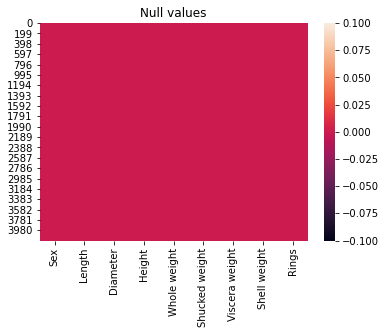

In [18]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

We clearly see no null values. Now since the data is all consistent the next step we need to take is categorize the feature 'sex' into integer values to make it suitable for prediction models. We do this with the help on one-hot-encoding.

In [19]:
df = pd.get_dummies(df)

In [20]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [22]:
df.shape

(4177, 11)

Now, with that done we can move forward with correlation matrix to find the correlation between the features to understand the weightage for each to the output

In [23]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
Length,1.000000,0.986812,0.828091,0.925261,0.897914,0.903018,0.897706,0.556720,0.309666,-0.551465,0.236543
Diameter,0.986812,1.000000,0.834265,0.925452,0.893162,0.899724,0.905330,0.574660,0.318626,-0.564315,0.240376
Height,0.828091,0.834265,1.000000,0.819916,0.775670,0.798951,0.819359,0.557755,0.298342,-0.518067,0.215064
Whole weight,0.925261,0.925452,0.819916,1.000000,0.969405,0.966375,0.955355,0.540390,0.299741,-0.557592,0.252038
Shucked weight,0.897914,0.893162,0.775670,0.969405,1.000000,0.931961,0.882617,0.420884,0.263991,-0.521842,0.251793
Viscera weight,0.903018,0.899724,0.798951,0.966375,0.931961,1.000000,0.907656,0.503819,0.308444,-0.556081,0.242194
Shell weight,0.897706,0.905330,0.819359,0.955355,0.882617,0.907656,1.000000,0.627574,0.306319,-0.546953,0.235391
Rings,0.556720,0.574660,0.557755,0.540390,0.420884,0.503819,0.627574,1.000000,0.250279,-0.436063,0.181831
Sex_F,0.309666,0.318626,0.298342,0.299741,0.263991,0.308444,0.306319,0.250279,1.000000,-0.464298,-0.512528
Sex_I,-0.551465,-0.564315,-0.518067,-0.557592,-0.521842,-0.556081,-0.546953,-0.436063,-0.464298,1.000000,-0.522541


we can also visualise the correlation through heatmap for better understanding

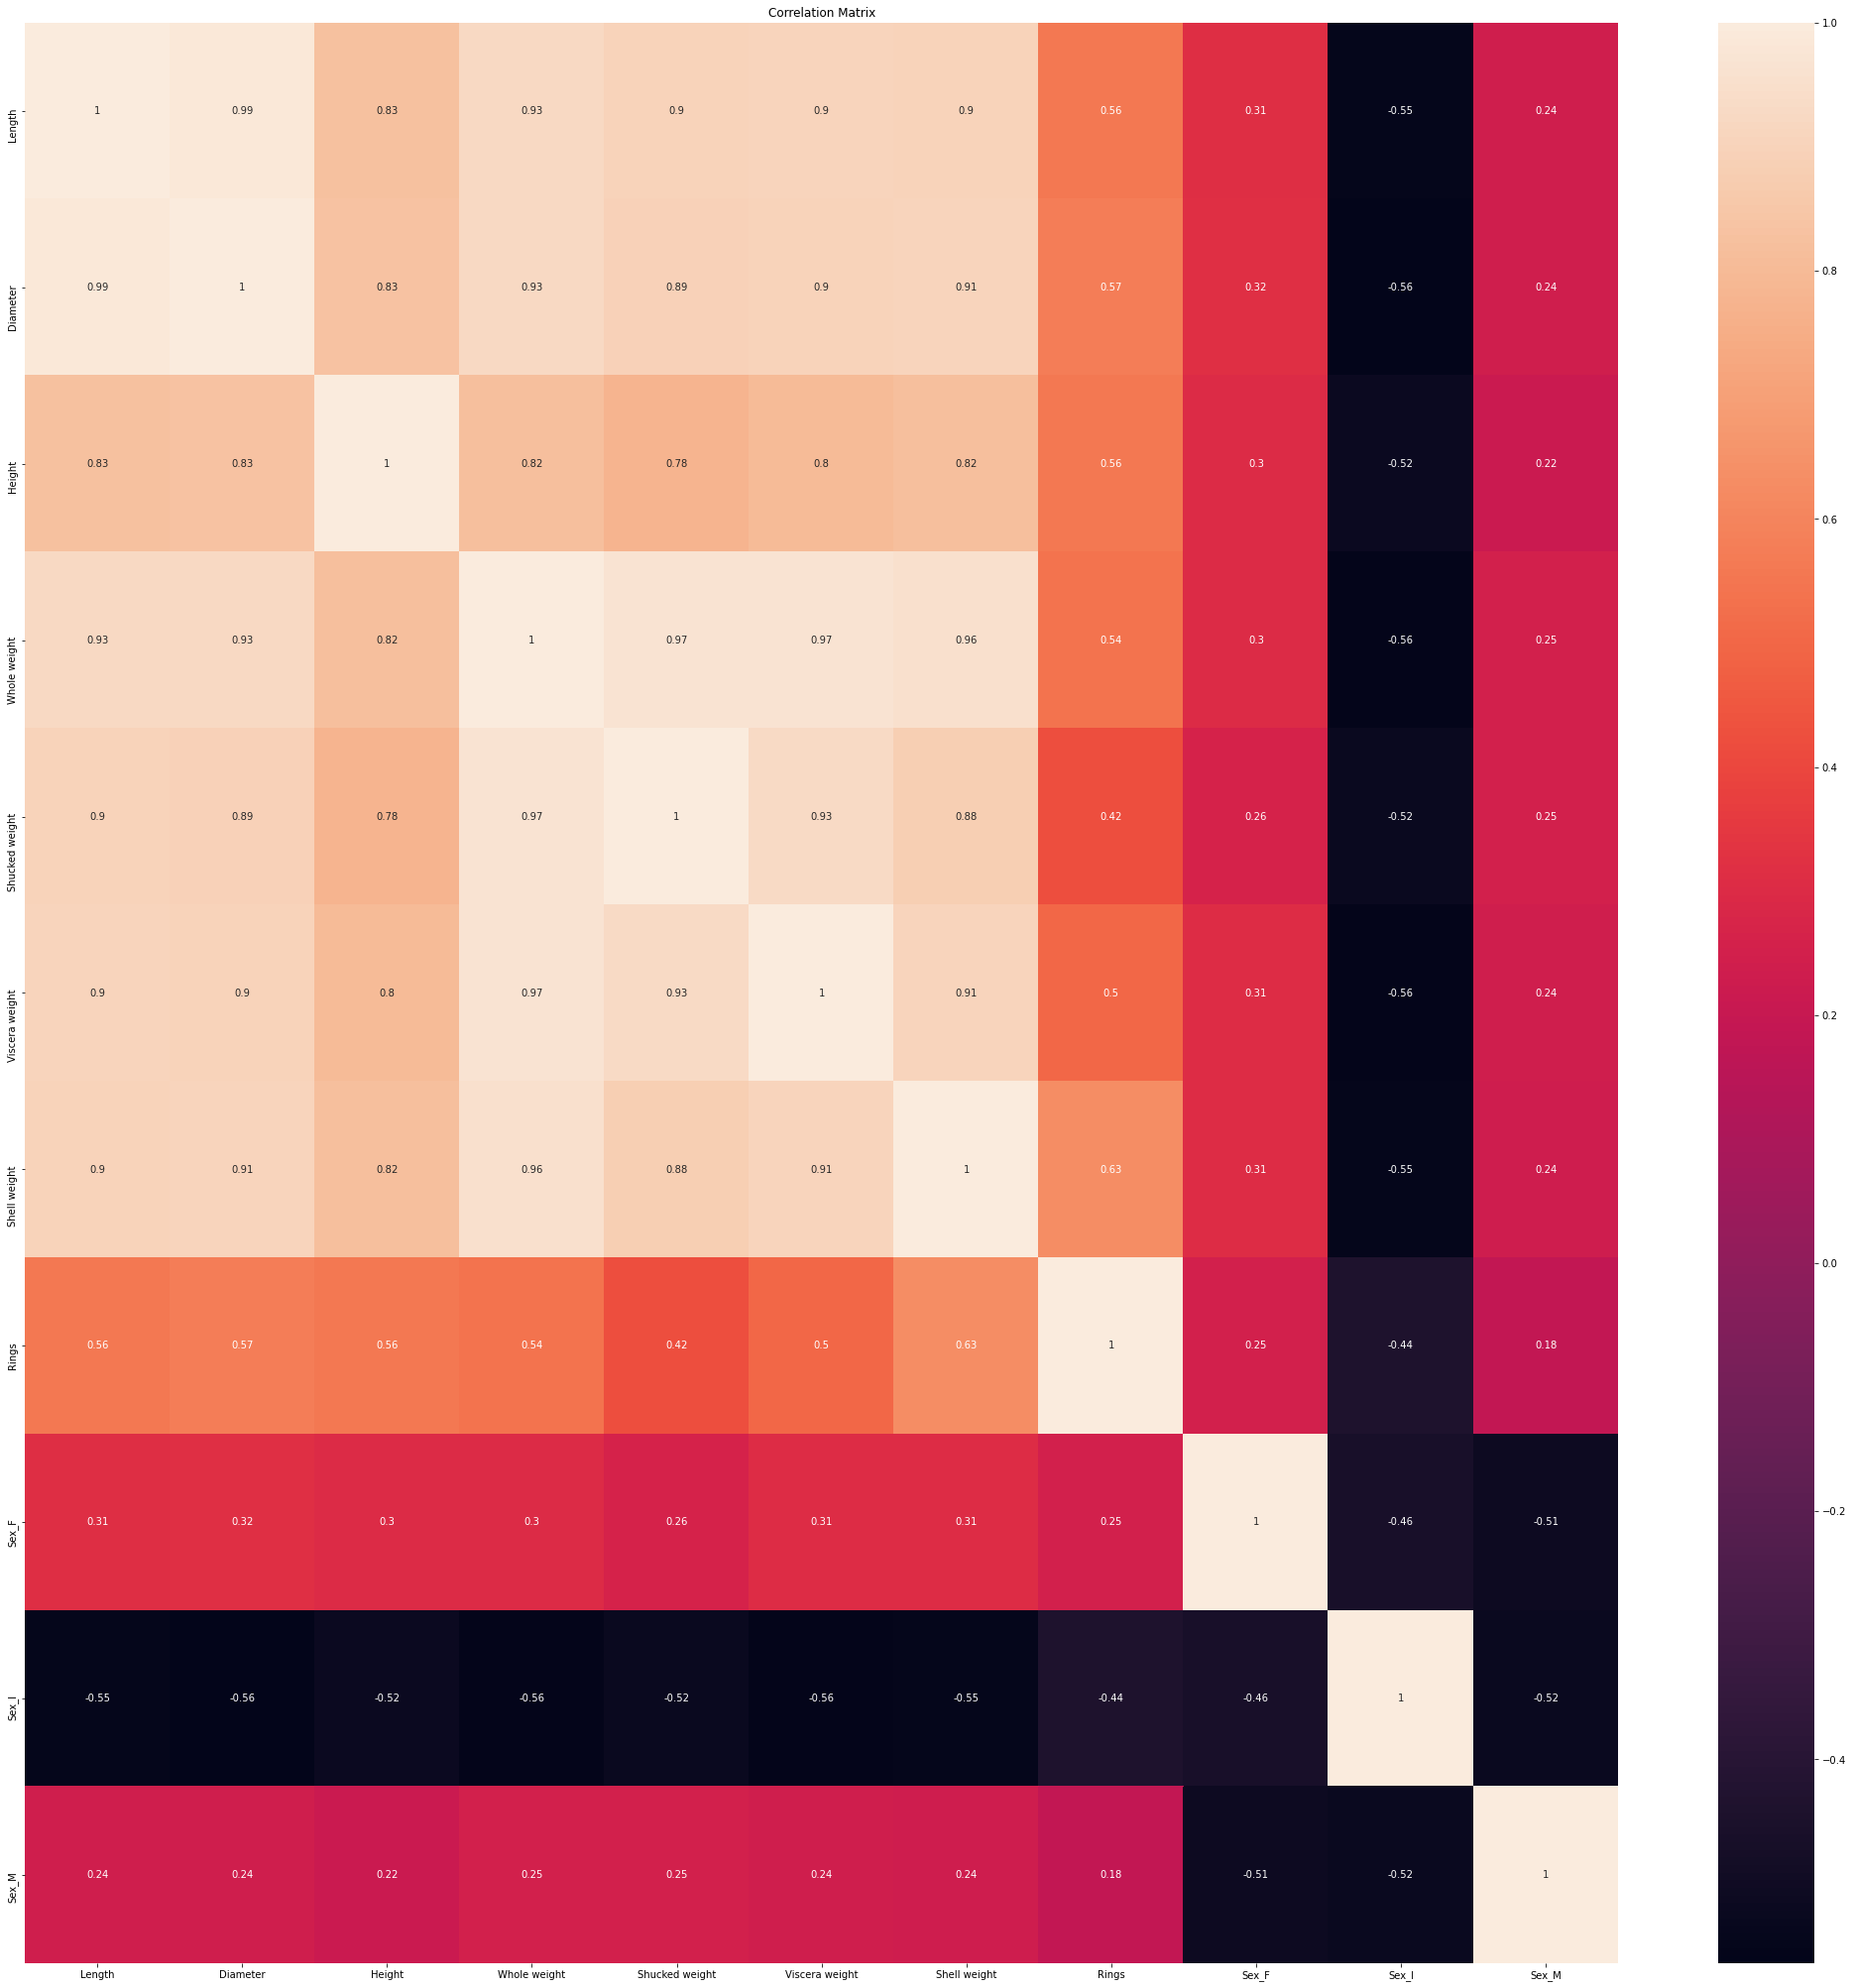

In [24]:
plt.figure(figsize=[36,36])
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

This allows to get a much better understanding of the relationships between my variables in a quick glimpse. Immediately, I can see that there are some variables that are strongly correlated to quality. It’s likely that these variables are also the most important features. 
Let us check this correlation to the target value 'rings'.

In [25]:
df.corr()['Rings'].sort_values()

Sex_I            -0.436063
Sex_M             0.181831
Sex_F             0.250279
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557755
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

We, can see that most data directly correlates with the target value excpet for infant sex which correlates inversly.


Now, we produce a boxlot diagram for each column to better understand the distribution of data and outliers

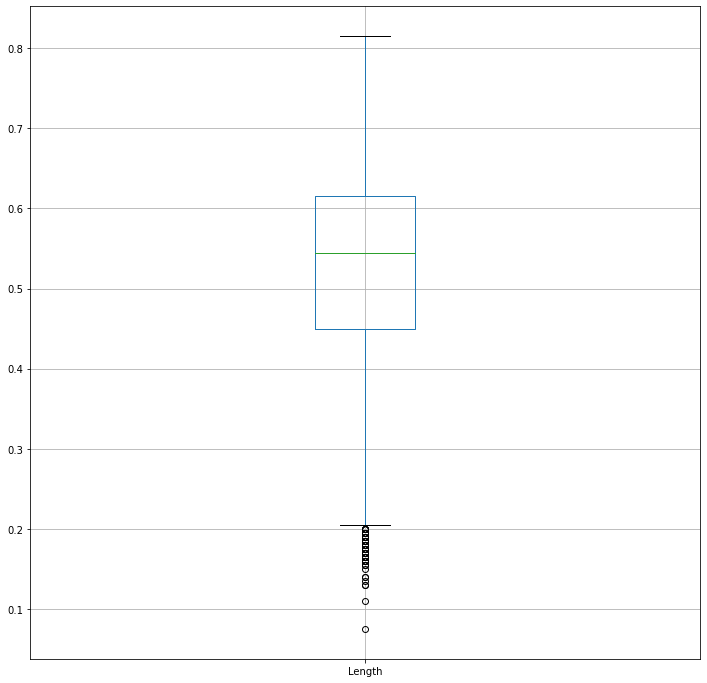

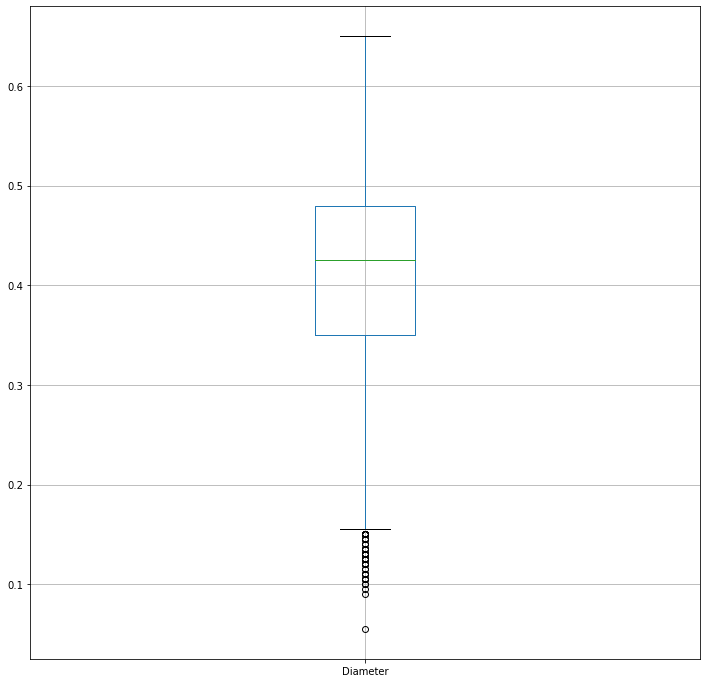

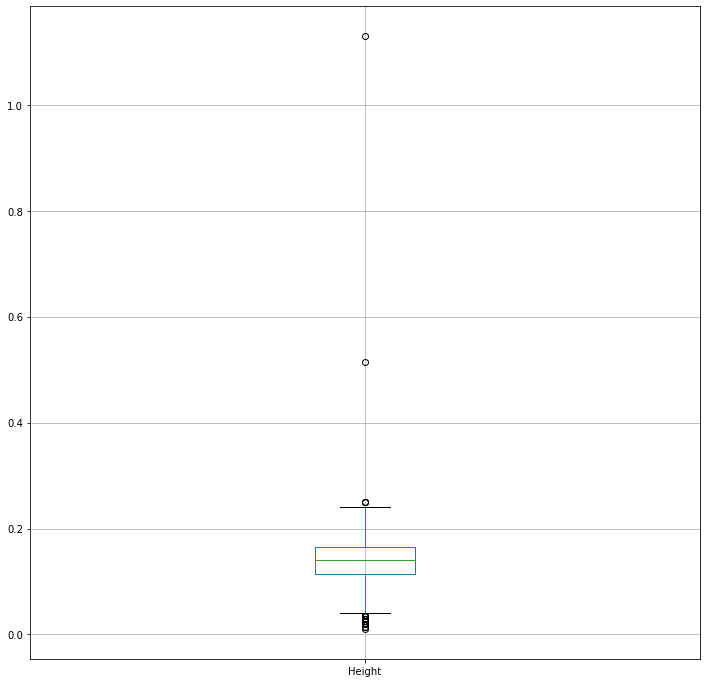

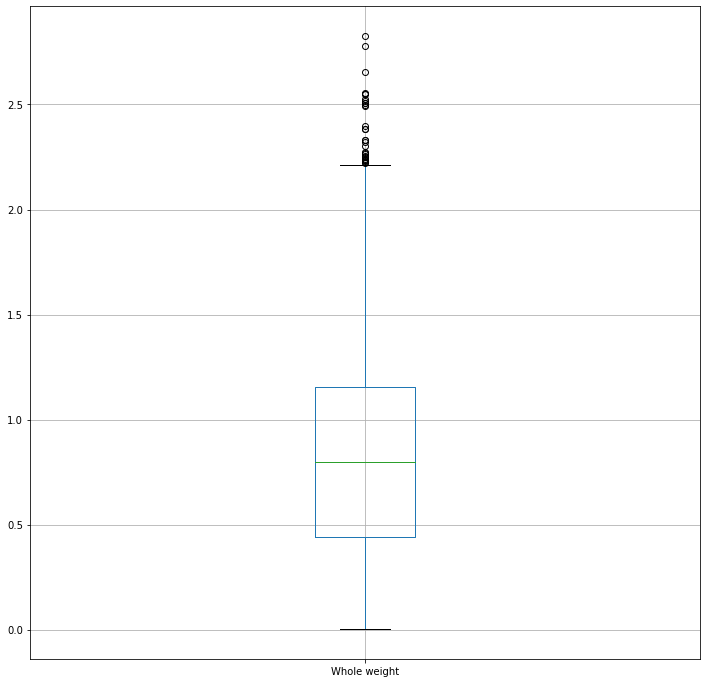

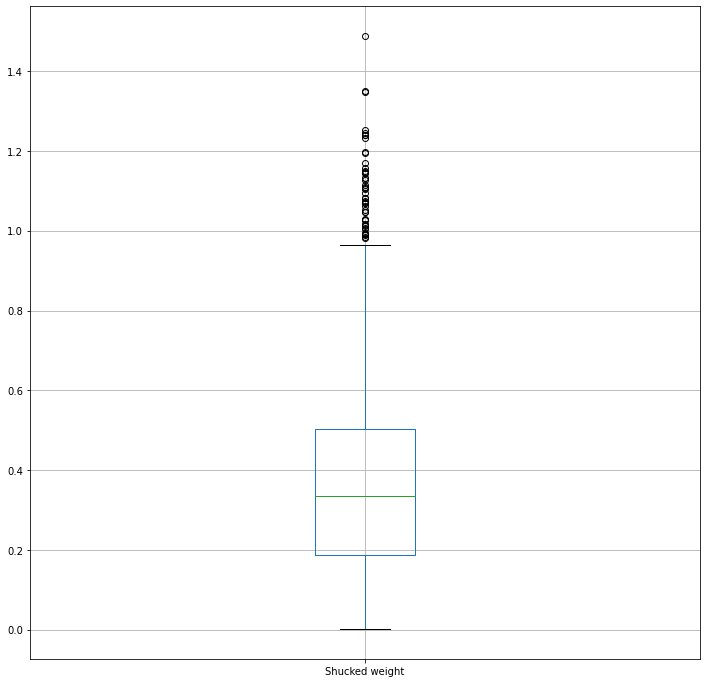

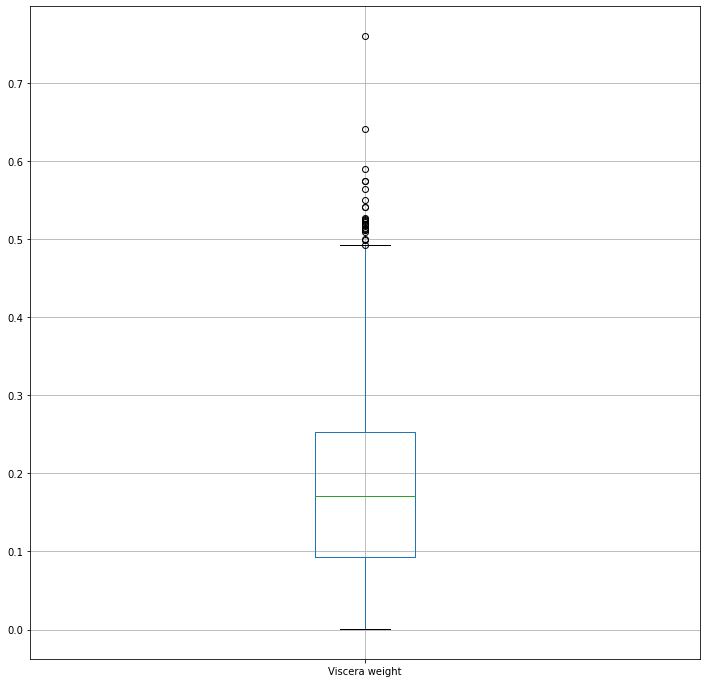

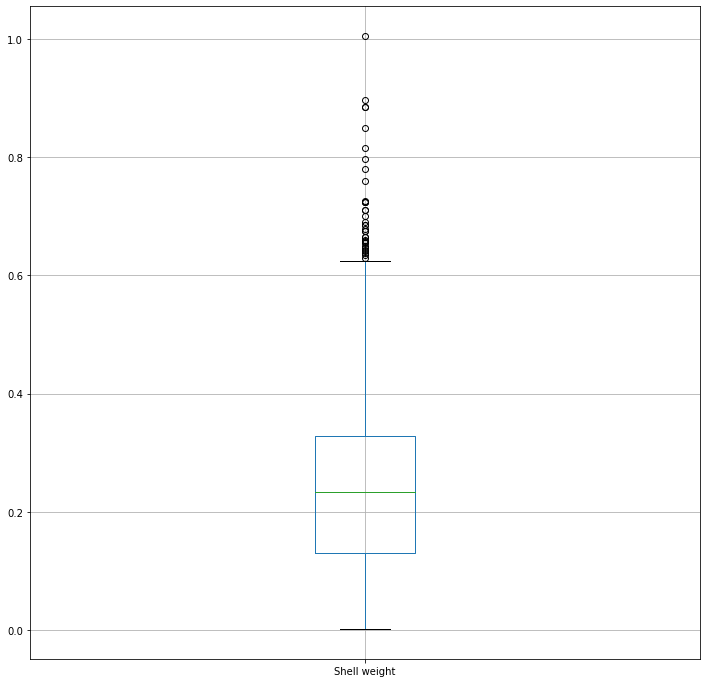

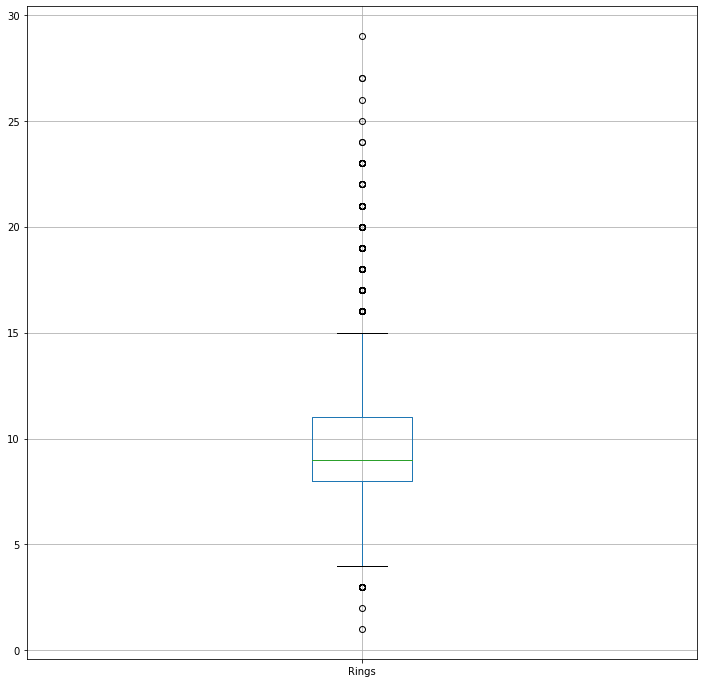

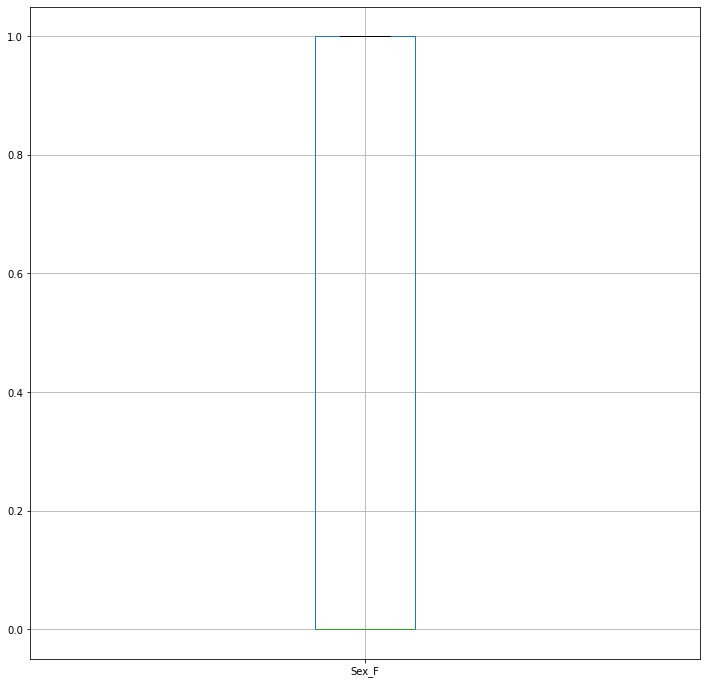

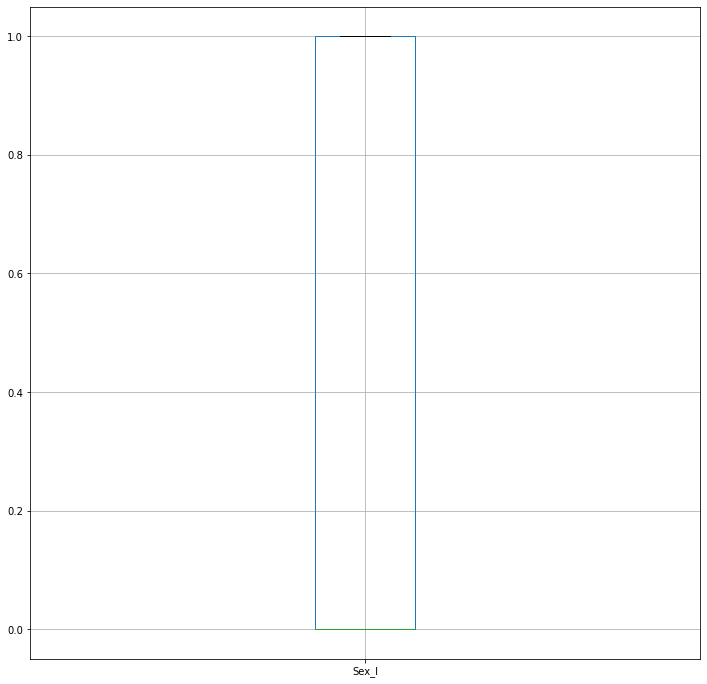

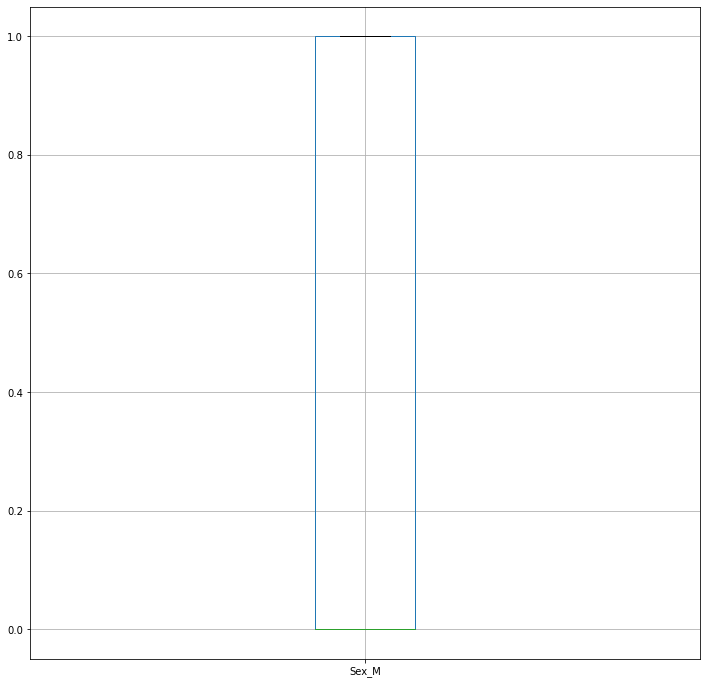

In [26]:
for column in df:
    plt.figure(figsize=(12,12))
    df.boxplot([column])

We see through the above boxplot that various data are present with huge outliers, let us produce a density diagram for the columns to understand the distribution and skewness

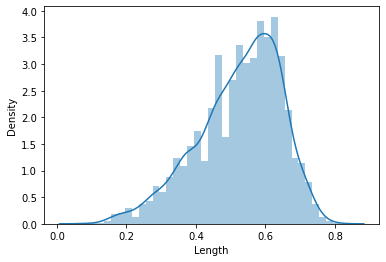

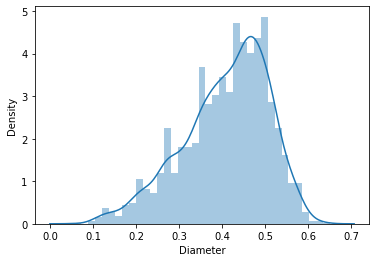

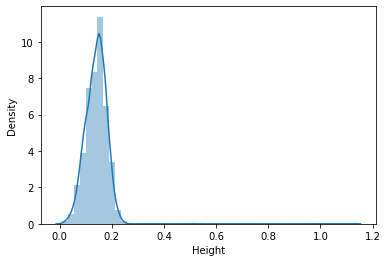

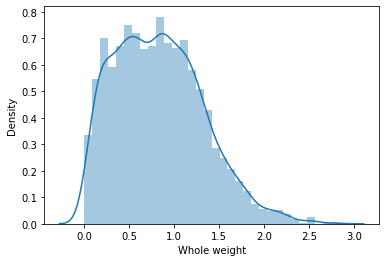

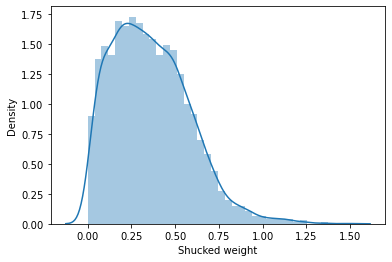

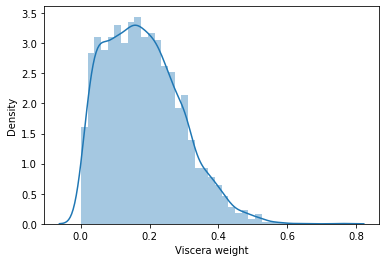

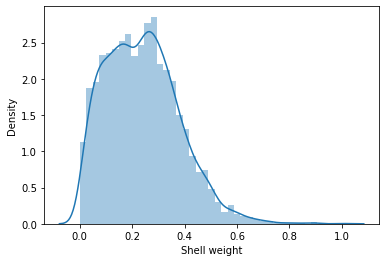

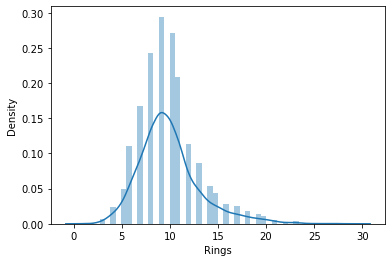

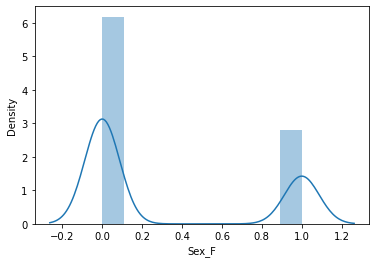

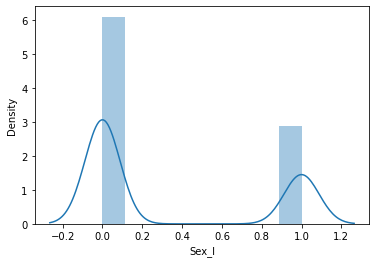

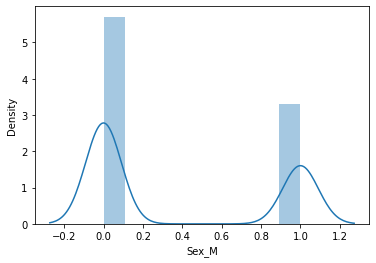

In [29]:
import warnings
warnings.filterwarnings('ignore')

for i in df.columns:
    sns.distplot(df[i])
    plt.show()

We can note that there are skewness in the data with almost a normal distribution, let us find the value of skewness.

In [30]:
df.skew().sort_values()

Length           -0.639873
Diameter         -0.609198
Whole weight      0.530959
Sex_M             0.557390
Viscera weight    0.591852
Shell weight      0.620927
Shucked weight    0.719098
Sex_I             0.765708
Sex_F             0.807302
Rings             1.114102
Height            3.166698
dtype: float64

Let us use the zscore method to get rid of the outliers present in the data

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.57455813, 0.43214879, 1.06836592, ..., 0.67483383, 0.68801788,
        1.31667716],
       [1.44898585, 1.439929  , 1.18822359, ..., 0.67483383, 0.68801788,
        1.31667716],
       [0.05003309, 0.12213032, 0.10950458, ..., 1.48184628, 0.68801788,
        0.75948762],
       ...,
       [0.6329849 , 0.67640943, 1.56850276, ..., 0.67483383, 0.68801788,
        1.31667716],
       [0.84118198, 0.77718745, 0.25006842, ..., 1.48184628, 0.68801788,
        0.75948762],
       [1.54905203, 1.48263359, 1.32878743, ..., 0.67483383, 0.68801788,
        1.31667716]])

In [32]:
z.shape

(4177, 11)

We know that limit for zscore should be in range from -3 to +3 to produce a normalized data and remove outliers. Let us use this limit to produce the dataset

In [33]:
df_new=df[(np.abs(z)<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 11)
(4029, 11)


We remove most of the data that are outliers to produce the dataset to 4029 rows from 4177.

Let us first split the dataset into feature values and target values before we trwat it for skewness

In [44]:
y=df_new["Rings"]
x=df_new.drop(columns="Rings")

Now, let us treat the independent variables for skewness using power transform method

In [45]:
from sklearn.preprocessing import power_transform

x=power_transform(x, method='yeo-johnson')

After treating the data for skewness let us move forward with modeling process. However, we will first scale the data suitable for modeling through standard scaler function

In [47]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

Now, since the data is ready for modelling. Let us first find the best random state to later plit the data for max accuracy

# Best Random State

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [49]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print(maxAccu, maxRS)

0.3027295285359802 46


Now, since we have calculated the best random state. We use the random state to split the data into test and train.

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=46)


Now we use different modelling classification to produce the best model

# Logistic Regression

In [51]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 30.272952853598017
[[ 2  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  7  9  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4 24 16  5  6  0  0  0  0  1  0  0  0  0  0]
 [ 0  2 11 37 16  6  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  8 25 43 38  7  2  0  0  0  0  1  0  0  0]
 [ 0  0  5 11 20 64 29  3  0  0  1  0  0  0  0  0]
 [ 0  0  1  7  8 45 37 18  1  5  1  0  0  0  0  0]
 [ 0  0  0  2  2 18 30 24  1  3  1  0  0  0  0  0]
 [ 0  0  0  4  1 16 15  9  0  1  4  0  1  0  0  0]
 [ 0  0  0  3  3  7 17 12  0  4  8  0  1  0  0  0]
 [ 0  0  0  0  1  0  9  4  0  2  1  0  0  0  0  0]
 [ 0  0  0  0  1  3  7  2  2  5  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  5  3  2  3  1  0  0  0  0  0]
 [ 0  0  0  0  1  0  4  4  1  1  1  0  0  1  0  0]
 [ 0  0  0  0  1  0  1  2  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           4       0.50      0.18      0.27        11
           5       0.33      0.30      0.32

# Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 19.35483870967742
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  5  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  7  3  5  0  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  6 16 18  8  4  0  1  0  1  1  0  0  0  0  0]
 [ 0  0  0 17 23 14  7  6  4  1  1  1  0  0  0  0  0]
 [ 0  0  1 12 22 27 29 13 13  1  3  1  1  0  0  0  1]
 [ 0  0  3  2 13 25 22 27 22 10  4  1  0  1  0  1  2]
 [ 0  0  0  1  7 15 33 22 19  8  5  1  3  1  2  3  3]
 [ 0  0  0  0  2  7 14 17 20  4  7  4  3  1  1  0  1]
 [ 0  0  0  1  1  4  6 16  8  3  5  2  2  1  1  0  1]
 [ 0  0  0  2  1  1  6 10  9  6  8  3  2  2  0  3  2]
 [ 0  0  0  0  0  0  2  1  3  3  2  1  1  1  1  1  1]
 [ 0  0  0  0  1  0  2  7  1  2  2  2  1  0  0  1  1]
 [ 0  0  0  0  0  1  1  3  1  2  1  3  1  2  2  0  0]
 [ 0  0  0  0  0  0  1  2  4  2  1  1  0  0  2  0  0]
 [ 0  0  0  0  0  1  1  0  2  0  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0]]
              precision    recall  f1-score   suppo

# Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 27.791563275434246
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  5  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  5  8  5  2  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6 20 21  4  2  1  1  0  1  0  0  0  0  0  0]
 [ 0  0  2 11 32 19  6  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  7 30 39 24 16  6  0  0  1  0  0  0  0  0]
 [ 0  0  1  2  7 29 47 28 13  2  2  2  0  0  0  0  0]
 [ 0  0  0  1  3 16 33 38 23  4  0  3  1  1  0  0  0]
 [ 0  0  0  0  1  5 19 20 26  3  4  1  2  0  0  0  0]
 [ 0  0  0  1  0  4  8 13 11  4  3  5  1  1  0  0  0]
 [ 0  0  0  1  0  6  3 15 12  5  5  2  2  2  2  0  0]
 [ 0  0  0  0  0  3  1  5  4  1  1  0  0  0  1  0  1]
 [ 0  0  0  0  0  1  4  3  4  1  3  2  0  0  2  0  0]
 [ 0  0  0  0  0  0  2  6  3  2  1  0  2  0  1  0  0]
 [ 0  0  0  0  0  0  1  4  2  0  2  2  0  2  0  0  0]
 [ 0  0  0  0  0  1  1  3  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0]]
              precision    recall  f1-score   supp

# SVC

In [54]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 30.52109181141439
[[ 0  9  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 11  6  5  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  6 19 20  3  6  2  0  0  0  0  0  0  0  0  0]
 [ 0  2  5 36 14 15  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 31 29 50 10  1  0  0  0  0  0  0  0  0]
 [ 0  0  4  2 15 79 32  1  0  0  0  0  0  0  0  0]
 [ 0  0  1  3  7 52 49 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2 24 30 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 22 22  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3 16 25  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3 10  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  7 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4 10  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  7  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.39      0.48      0.43 

# Cross Validation

Now we do a crossvalidation for the models

In [55]:
from sklearn.model_selection import cross_val_score 

In [56]:
scr1 = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression is: \t", scr1.mean())

Cross validation score of Logistic Regression is: 	 0.2725265477860148


In [57]:
scr2 = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest is: \t", scr2.mean())

Cross validation score of Random Forest is: 	 0.26210132083904875


In [58]:
scr3 = cross_val_score(dt, x, y, cv=5)
print("Cross validation score of Decision Tree is: \t", scr3.mean())

Cross validation score of Decision Tree is: 	 0.1928560639921089


In [59]:
scr4 = cross_val_score(svc, x, y, cv=5)
print("Cross validation score of SVC is: \t", scr4.mean())

Cross validation score of SVC is: 	 0.26681966000339075


We can see that Logistic Regression performs the best among others

# Hyper Parameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameters = {'C': np.logspace(-3,3,7),
              'solver': ['newton-cg','lbfgs','liblinear']}

In [62]:
gcv=GridSearchCV(lr,parameters,cv=5,scoring='accuracy')

In [63]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [64]:
gcv.best_params_

{'C': 1.0, 'solver': 'newton-cg'}

In [65]:
print("Tuned Hyperparameters :", gcv.best_params_)
print("Accuracy :",gcv.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'solver': 'newton-cg'}
Accuracy : 0.26404593384370934


In [66]:
gcv_pred=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.3052109181141439

Now, we dump the data using pickle feature

In [68]:
import joblib
joblib.dump(gcv.best_estimator_,"abalone.pkl")

['abalone.pkl']